# <center>CLASSIFICATION</center>

## Binary Classification Problem :
- ANTI-NATIONAL : 1
- NON ANTI-NATIONAL : 0

For classifying the webpages,we added a column / feature **CLASSIFY** which had values 0 or 1. 

## Import The Necessary Libraries

In [2]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import scale
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

In [45]:
database = pd.read_csv('DATABASE.csv')
del database['Unnamed: 0']
database = database.convert_objects(convert_numeric = True)
database.head()

E:\ANACONDA\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  This is separate from the ipykernel package so we can avoid doing imports until


,DESCRIPTION,DATE,MONTH,YEAR,CITY,STATE,ZONE,CASUALITIES,NUMBER OF CASUALITIES,EQUIPMENTS,LITERACY,POPULATION,NUMBER OF INCIDENTS,GROWTH IN GDP,INFLATION,TERRORIST GROUP,CLASSIFY
0,1993 blasts: Sanjay Dutt guilty under Arms Act...,2006-11-28,NOVEMBER,2006,---,---,---,No,0.0,---,NaN,NaN,167.0,9.3%,6.7%,DATA NOT AVAILABLE,1
1,Over 300 Stone Pelting Incidents in Kashmir Si...,2019-10-10,OCTOBER,2019,---,Jammu and Kashmir,North,No,0.0,STONE,68.74,NaN,NaN,DATA NOT AVAILABLE,DATA NOT AVAILABLE,DATA NOT AVAILABLE,1
2,\r\r\r\r\r\r\r\r\n\r\r\r\r\r\r\r\r\n\r\r\r\r\r...,2007-10-22,OCTOBER,2007,---,---,---,No,0.0,---,NaN,NaN,149.0,9.8%,6.2%,DATA NOT AVAILABLE,0
3,At Least 100 Dead in India Terror Attacks.\r\r...,2008-11-26,NOVEMBER,2008,---,---,---,Yes,100.0,---,NaN,NaN,534.0,3.9%,9.1%,DATA NOT AVAILABLE,1
4,\r\r\r\r\r\r\r\r\nTwo killed in first gun batt...,2019-08-21,AUGUST,2019,---,Jammu and Kashmir,North,Yes,2.0,gun,68.74,NaN,NaN,DATA NOT AVAILABLE,DATA NOT AVAILABLE,DATA NOT AVAILABLE,1


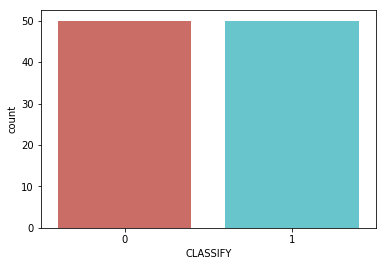

In [7]:
sns.countplot(x = 'CLASSIFY',data = database,palette = 'hls')

In [50]:
x_data = database['DESCRIPTION']
y_data = database['CLASSIFY']

- Single feature of **Description** is selected for classification

### Term Frequency - Inverse Document Frequency
- Used for encoding text data

In [51]:
tfidf = TfidfVectorizer(stop_words= 'english', min_df = 1)

x_train , x_test , y_train , y_test = train_test_split(x_data,y_data,test_size = 0.25,random_state = 2)

x_train_tfidf = tfidf.fit_transform(x_train)

x_test_tfidf = tfidf.transform(x_test)

### Multinomial Naive Bayes Algoirthm :

In [52]:
mnb = MultinomialNB(alpha=3)
mnb.fit(x_train_tfidf,y_train)

MultinomialNB(alpha=3, class_prior=None, fit_prior=True)

In [53]:
pred = mnb.predict(x_test_tfidf)
pred

array([1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1], dtype=int64)

In [58]:
true_pred = np.array(y_test)
true_pred

array([0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1], dtype=int64)

In [63]:
print ("Accuracy : ", accuracy_score(true_pred, pred))

Accuracy :  0.88


#### Cross Validating Hyperparameters & Tuning the model

In [64]:
parameters = {'alpha':[0,10]}
clf = GridSearchCV(mnb,parameters)

clf.fit(x_test_tfidf,y_test)

E:\ANACONDA\lib\site-packages\sklearn\naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
E:\ANACONDA\lib\site-packages\sklearn\naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
E:\ANACONDA\lib\site-packages\sklearn\naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
E:\ANACONDA\lib\site-packages\sklearn\naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
E:\ANACONDA\lib\site-packages\sklearn\naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


GridSearchCV(cv=None, error_score=nan,
             estimator=MultinomialNB(alpha=3, class_prior=None, fit_prior=True),
             iid='deprecated', n_jobs=None, param_grid={'alpha': [0, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

- Tuned Hyperparamter **alpha** : 3

In [65]:
cm = confusion_matrix(true_pred, pred) 
cm

array([[ 8,  3],
       [ 0, 14]], dtype=int64)

In [66]:
roc_auc_score(y_test,pred)

0.8636363636363636

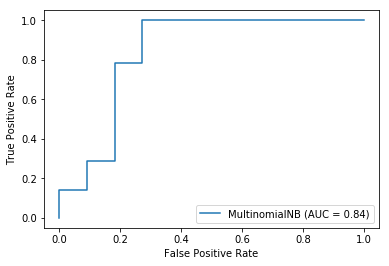

In [67]:
plot_roc_curve(mnb,x_test_tfidf,y_test)

### Logistic Regression Algorithm :

In [146]:
# INPUT FEATURES
x = database.iloc[:,0].values 

# TARGET VALUES
y = database.iloc[:,16].values

In [148]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 2)

In [151]:
tfidf = TfidfVectorizer(stop_words= 'english', min_df = 1)

x_train_tfidf = tfidf.fit_transform(x_train)
x_test_tfidf = tfidf.transform(x_test)

In [119]:
classifier = LogisticRegression(random_state = 0,C=1000,penalty= 'l2') 
classifier.fit(x_train_tfidf, y_train) 

y_pred = classifier.predict(x_test_tfidf) 
y_pred

array([0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1], dtype=int64)

#### Cross Validating Hyperparameters & Tuning the model

In [ ]:
penalty = ['l1', 'l2']

C = [0,10,100,1000]

hyperparameters = dict(C=C, penalty=penalty)

clf = GridSearchCV(classifier, hyperparameters, cv=10,n_jobs = -1)
best_model = clf.fit(x_test_tfidf, y_test)
best_model

accuracy = clf.best_score_
accuracy

clf.best_params_

In [91]:
classifier = LogisticRegression(random_state = 0,C=1000,penalty= 'l2') 
print(cross_val_score(classifier,x_train_tfidf,y_train,cv = 10,scoring = 'accuracy').mean())

0.7892857142857143


In [92]:
print(cross_val_score(mnb,x_train_tfidf,y_train,cv = 10,scoring = 'accuracy').mean())

0.75


In [130]:
actual_pred = np.array(y_test)
print(actual_pred)

cm = confusion_matrix(y_test, y_pred) 

print(cm)

[0 1 1 0 1 0 0 1 1 1 0 0 0 1 1 0 1 1 0 1 1 1 0 0 1]
[[ 9  2]
 [ 2 12]]


Accuracy :  0.84
0.8376623376623377


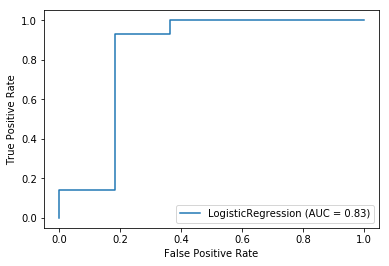

In [131]:
print ("Accuracy : ", accuracy_score(y_test, y_pred)) 
print(roc_auc_score(y_test,y_pred))
logreg = plot_roc_curve(classifier, x_test_tfidf, y_test)
plt.show()

# <center>DEMONSTRATION</center>

In [134]:
data = pd.read_csv('DEMO.csv')
del data['Unnamed: 0']
data.head()

,DESCRIPTION,DATE,MONTH,YEAR,CITY,STATE,ZONE,CASUALTIES,NUMBER OF CASUALTIES,EQUIPMENTS,LITERACY,POPULATION,NUMBER OF INCIDENTS,GROWTH IN GDP,INFLATION,TERRORIST GROUP
0,9 jawans injured in IED blast in Pulwama.An ar...,2019-06-17 00:00:00,JUNE,2019,Pulwama,Jammu and Kashmir,North,Yes,9,IED,68.74,570060,DATA NOT AVAILABLE,DATA NOT AVAILABLE,DATA NOT AVAILABLE,DATA NOT AVAILABLE
1,Our orbiter located Vikram lander first: Isro ...,2019-12-04 00:00:00,DECEMBER,2019,---,---,---,No,0,---,DATA NOT AVAILABLE,DATA NOT AVAILABLE,DATA NOT AVAILABLE,DATA NOT AVAILABLE,DATA NOT AVAILABLE,DATA NOT AVAILABLE


In [158]:
x = data['DESCRIPTION']

In [161]:
x_tfidf = tfidf.transform(x)

## <center>Webpage Screenshot Of Pulwama Incident</center>

<img src = "Images/PULWAMA_INCIDENT.png">

## <center>Webpage Screenshot Of ISRO news</center>

<img src = "Images/ISRO_NEWS_ARTICLE.png">

###  <center>Model Prediction</center>

In [164]:
prediction = classifier.predict(x1_tfidf) 
prediction

array([1, 0], dtype=int64)

# <center>END</center>